# Role Detection


Visualize the graph role for diverse time.

[weekdays]<br>
1. commuted time<br>
    6-10<br>
    16-21<br>
2. regular time(except commuted time)<br>
    10-16<br>
    
[weekends]<br>

3. time on weekends<br>
    6-10<br>
    10-16<br>
    16-21



In [90]:
import numpy as np
import pandas as pd
import pickle
import networkx as nx
import datetime as dt

from graphrole import RecursiveFeatureExtractor, RoleExtractor
from pprint import pprint
import seaborn as sns
import warnings

import folium
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [68]:
warnings.filterwarnings(action='ignore')

## Location EDA

- sensor location visualization
- role detection based on location

In [69]:
%pwd

'C:\\Users\\User\\OneDrive - postech.ac.kr\\1-1\\ML for graph\\project\\Traffic-Prediction\\code'

In [70]:
location = pd.read_csv('../../data/graph_sensor_locations_bay.csv',header = None)
location.columns=['sensor_id','latitude','longitude']
location

sensor_id   latitude   longitude
0       400001  37.364085 -121.901149
1       400017  37.253303 -121.945440
2       400030  37.359087 -121.906538
3       400040  37.294949 -121.873109
4       400045  37.363402 -121.902233
..         ...        ...         ...
320     413845  37.422887 -121.925747
321     413877  37.321613 -121.899642
322     413878  37.324641 -121.888603
323     414284  37.323066 -121.896538
324     414694  37.315051 -121.913497

[325 rows x 3 columns]

In [71]:
map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=12)


for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    
    # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color='blue'))
    marker.add_to(map_osm)

map_osm

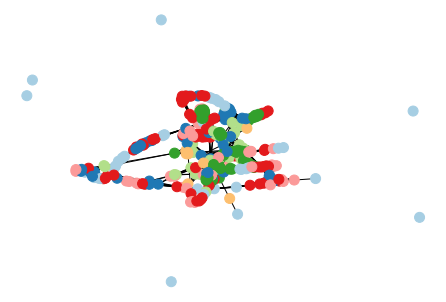

In [72]:
### Read adj_matrix (DCRNN>data)
with open('../../data/adj_mx_bay_distance.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    adj_bay = u.load()
adj_bay = np.array(adj_bay)[-1]

G = nx.Graph(adj_bay)

feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

node_roles = role_extractor.roles

# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in G.nodes]


# plot graph
plt.figure()
with warnings.catch_warnings():
    # catch matplotlib deprecation warning
#     warnings.simplefilter('ignore')
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
    
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        # with_labels=True,
        node_color=node_colors,
        node_size= 100, #default=300
        font_size = 5 #default=12
    )
plt.show()

In [73]:
len(unique_roles)

7

In [74]:
node_roles 

{0: 'role_0',
 1: 'role_0',
 2: 'role_1',
 3: 'role_3',
 4: 'role_1',
 5: 'role_1',
 6: 'role_3',
 7: 'role_4',
 8: 'role_7',
 9: 'role_1',
 10: 'role_7',
 11: 'role_5',
 12: 'role_0',
 13: 'role_3',
 14: 'role_5',
 15: 'role_4',
 16: 'role_2',
 17: 'role_1',
 18: 'role_2',
 19: 'role_1',
 20: 'role_2',
 21: 'role_0',
 22: 'role_4',
 23: 'role_5',
 24: 'role_4',
 25: 'role_3',
 26: 'role_2',
 27: 'role_0',
 28: 'role_3',
 29: 'role_0',
 30: 'role_5',
 31: 'role_2',
 32: 'role_0',
 33: 'role_1',
 34: 'role_2',
 35: 'role_0',
 36: 'role_0',
 37: 'role_4',
 38: 'role_3',
 39: 'role_0',
 40: 'role_1',
 41: 'role_3',
 42: 'role_3',
 43: 'role_3',
 44: 'role_0',
 45: 'role_1',
 46: 'role_7',
 47: 'role_4',
 48: 'role_2',
 49: 'role_1',
 50: 'role_2',
 51: 'role_3',
 52: 'role_0',
 53: 'role_4',
 54: 'role_0',
 55: 'role_1',
 56: 'role_2',
 57: 'role_5',
 58: 'role_3',
 59: 'role_3',
 60: 'role_4',
 61: 'role_5',
 62: 'role_2',
 63: 'role_4',
 64: 'role_5',
 65: 'role_3',
 66: 'role_1',
 67: 

In [75]:
# same format as the variable 'partition' in Louvian-community.ipynb
node_roles.update((k, int(v.split("_")[1])) for k, v in node_roles.items())
node_roles

{0: 0,
 1: 0,
 2: 1,
 3: 3,
 4: 1,
 5: 1,
 6: 3,
 7: 4,
 8: 7,
 9: 1,
 10: 7,
 11: 5,
 12: 0,
 13: 3,
 14: 5,
 15: 4,
 16: 2,
 17: 1,
 18: 2,
 19: 1,
 20: 2,
 21: 0,
 22: 4,
 23: 5,
 24: 4,
 25: 3,
 26: 2,
 27: 0,
 28: 3,
 29: 0,
 30: 5,
 31: 2,
 32: 0,
 33: 1,
 34: 2,
 35: 0,
 36: 0,
 37: 4,
 38: 3,
 39: 0,
 40: 1,
 41: 3,
 42: 3,
 43: 3,
 44: 0,
 45: 1,
 46: 7,
 47: 4,
 48: 2,
 49: 1,
 50: 2,
 51: 3,
 52: 0,
 53: 4,
 54: 0,
 55: 1,
 56: 2,
 57: 5,
 58: 3,
 59: 3,
 60: 4,
 61: 5,
 62: 2,
 63: 4,
 64: 5,
 65: 3,
 66: 1,
 67: 5,
 68: 1,
 69: 5,
 70: 7,
 71: 0,
 72: 3,
 73: 3,
 74: 1,
 75: 1,
 76: 3,
 77: 0,
 78: 4,
 79: 5,
 80: 2,
 81: 5,
 82: 2,
 83: 1,
 84: 1,
 85: 0,
 86: 4,
 87: 3,
 88: 2,
 89: 3,
 90: 1,
 91: 5,
 92: 0,
 93: 1,
 94: 1,
 95: 5,
 96: 4,
 97: 3,
 98: 0,
 99: 2,
 100: 4,
 101: 4,
 102: 3,
 103: 3,
 104: 1,
 105: 0,
 106: 4,
 107: 3,
 108: 5,
 109: 3,
 110: 3,
 111: 5,
 112: 5,
 113: 4,
 114: 0,
 115: 4,
 116: 3,
 117: 1,
 118: 0,
 119: 5,
 120: 1,
 121: 2,
 122: 3,
 12

In [76]:
colors = ['orange', 'blue', 'lightblue', 'lightred', 'beige', 'darkred', 'lightgreen', 'darkblue', 'black', 'darkgreen', 'pink', 'cadetblue', 'white', 'green', 'gray', 'darkpurple', 'purple', 'lightgray', 'red']
len(colors)

19

In [102]:
location.index

RangeIndex(start=0, stop=325, step=1)

In [77]:
map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=17)

for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    c = node_roles[i]

    marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
    marker.add_to(map_osm)

map_osm

In [78]:
map_osm.save('../../data/bay_role_all.html')

## Comumunity detection by Speed

In [79]:
speed_bay = pd.read_csv("../../data/bay_speed.csv")
speed_bay

Unnamed: 0  400001  400017  400030  400040  400045  400052  \
0      2017-01-01 00:00:00    71.4    67.8    70.5    67.4    68.8    66.6   
1      2017-01-01 00:05:00    71.6    67.5    70.6    67.5    68.7    66.6   
2      2017-01-01 00:10:00    71.6    67.6    70.2    67.4    68.7    66.1   
3      2017-01-01 00:15:00    71.1    67.5    70.3    68.0    68.5    66.7   
4      2017-01-01 00:20:00    71.7    67.8    70.2    68.1    68.4    66.9   
...                    ...     ...     ...     ...     ...     ...     ...   
52111  2017-06-30 23:35:00    70.9    66.3    68.4    61.0    61.8    66.9   
52112  2017-06-30 23:40:00    71.3    66.6    68.7    60.9    62.0    66.2   
52113  2017-06-30 23:45:00    71.4    66.9    68.1    61.1    62.0    66.7   
52114  2017-06-30 23:50:00    72.2    66.5    68.0    61.1    62.5    65.8   
52115  2017-06-30 23:55:00    71.5    66.2    68.4    61.5    62.8    66.1   

       400057  400059  400065  ...  409525  409526  409528  409529  413026  \
0        66.8    68.0    66.8  ...    68.8    67.9    68.8    68.0    69.2   
1        66.8    67.8    66.5  ...    68.4    67.3    68.4    67.6    70.4   
2        66.8    67.8    66.2  ...    68.4    67.4    68.4    67.5    70.2   
3        66.6    67.7    65.9  ...    68.5    67.5    68.5    67.5    70.4   
4        66.1    67.7    66.1  ...    68.5    67.7    68.5    67.4    69.6   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
52111    66.0    67.4    65.4  ...    64.6    66.8    64.7    61.1    68.4   
52112    66.5    68.2    64.9  ...    65.1    67.3    64.8    60.8    69.8   
52113    65.8    68.2    64.2  ...    64.9    66.5    64.6    61.3    69.5   
52114    67.1    68.3    64.0  ...    64.1    65.9    64.8    61.3    69.6   
52115    67.7    68.4    64.9  ...    64.3    66.5    64.8    60.9    70.9   

       413845  413877  413878  414284  414694  
0        68.9    70.4    68.8    71.1    68.0  
1        68.8    70.1    68.4    70.8    67.4  
2        68.3    69.8    68.4    70.5    67.9  
3        68.7    70.2    68.4    70.8    67.6  
4        69.1    70.0    68.4    71.0    67.9  
...       ...     ...     ...     ...     ...  
52111    61.4    70.5    68.2    71.6    66.2  
52112    62.2    69.4    68.6    71.6    68.4  
52113    63.8    70.6    68.4    71.6    66.6  
52114    64.2    70.2    68.7    71.6    68.4  
52115    63.4    70.3    68.7    71.6    68.0  

[52116 rows x 326 columns]

### add day_name

In [80]:
speed_bay['Unnamed: 0'] = pd.to_datetime(speed_bay['Unnamed: 0'])
speed_bay['w_name'] = speed_bay['Unnamed: 0'].dt.day_name()
speed_bay.head()

Unnamed: 0  400001  400017  400030  400040  400045  400052  400057  \
0 2017-01-01 00:00:00    71.4    67.8    70.5    67.4    68.8    66.6    66.8   
1 2017-01-01 00:05:00    71.6    67.5    70.6    67.5    68.7    66.6    66.8   
2 2017-01-01 00:10:00    71.6    67.6    70.2    67.4    68.7    66.1    66.8   
3 2017-01-01 00:15:00    71.1    67.5    70.3    68.0    68.5    66.7    66.6   
4 2017-01-01 00:20:00    71.7    67.8    70.2    68.1    68.4    66.9    66.1   

   400059  400065  ...  409526  409528  409529  413026  413845  413877  \
0    68.0    66.8  ...    67.9    68.8    68.0    69.2    68.9    70.4   
1    67.8    66.5  ...    67.3    68.4    67.6    70.4    68.8    70.1   
2    67.8    66.2  ...    67.4    68.4    67.5    70.2    68.3    69.8   
3    67.7    65.9  ...    67.5    68.5    67.5    70.4    68.7    70.2   
4    67.7    66.1  ...    67.7    68.5    67.4    69.6    69.1    70.0   

   413878  414284  414694  w_name  
0    68.8    71.1    68.0  Sunday  
1    68.4    70.8    67.4  Sunday  
2    68.4    70.5    67.9  Sunday  
3    68.4    70.8    67.6  Sunday  
4    68.4    71.0    67.9  Sunday  

[5 rows x 327 columns]

In [81]:
speed_bay['w_name']

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
          ...  
52111    Friday
52112    Friday
52113    Friday
52114    Friday
52115    Friday
Name: w_name, Length: 52116, dtype: object

### seperate data by time

6-10,10-16,16-21

In [82]:
date_time = list(speed_bay['Unnamed: 0'])

In [83]:
six_to_10 = []
ten_to_16 =[]
sixteens_to_21 = []

for i in range(len(date_time)):
    if date_time[i].hour in range(6,10):
        six_to_10.append(speed_bay.iloc[i])
        
    elif speed_bay['Unnamed: 0'][i].hour in range(10,16):
        ten_to_16.append(speed_bay.iloc[i])
        
    elif speed_bay['Unnamed: 0'][i].hour in range(16,21):
        sixteens_to_21.append(speed_bay.iloc[i])
        
        
six_to_10 = pd.DataFrame(six_to_10)
ten_to_16 = pd.DataFrame(ten_to_16)
sixteens_to_21 = pd.DataFrame(sixteens_to_21)

### weekdays and weekends

In [84]:
six_to_10_S = six_to_10[(six_to_10['w_name'] == 'Sunday')| (six_to_10['w_name'] == 'Saturday')] #S: weekends
six_to_10_W = six_to_10[(six_to_10['w_name']!= 'Sunday') & (six_to_10['w_name'] != 'Saturday')] #W: weekdays


ten_to_16_S = ten_to_16[(ten_to_16['w_name'] == 'Sunday')| (ten_to_16['w_name'] == 'Saturday')]
ten_to_16_W = ten_to_16[(ten_to_16['w_name']!= 'Sunday') & (ten_to_16['w_name'] != 'Saturday')]

sixteens_to_21_S = sixteens_to_21[(sixteens_to_21['w_name'] == 'Sunday')| (sixteens_to_21['w_name'] == 'Saturday')]
sixteens_to_21_W = sixteens_to_21[(sixteens_to_21['w_name']!= 'Sunday') & (sixteens_to_21['w_name'] != 'Saturday')]


### make adjacent matrix

- for mean of sensor's speed
- by using gaussian kernels

In [91]:
def Gaussian(x, z, sigma):
    return np.exp((-(np.linalg.norm(x-z)**2))/(2*sigma**2))

def GaussianMatrix(X, sigma):
    row, col = X.shape
    GassMatrix = np.zeros(shape=(row, row))
    X = np.asarray(X)
    i=0
    for v_i in X:
        j=0
        for v_j in X:
            GassMatrix[i, j] = Gaussian(v_i.T, v_j.T, sigma)
            j+=1
        i+=1
    return GassMatrix

def adj_mat_speed(data):
    # mean speed per sensors for each time slot (shape: (# of sensor)x1)
    mean = pd.DataFrame(data.mean(axis = 0)) 
    # calculate similarity between all sensors (shape: (# of sensor)x(# of sensor))
    adj_mat = GaussianMatrix(mean, sigma = 1)
    
    return adj_mat

In [92]:
def visualization_role(data, location):
    
    G = nx.Graph(adj_mat_speed(data))
    
    # role analysis
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()

    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)

    node_roles = role_extractor.roles
    node_roles.update((k, int(v.split("_")[1])) for k, v in node_roles.items())
    
    partition = node_roles
    
    stat = pd.DataFrame(data.mean(axis = 0), columns = ['AvgSpeed'])
    stat['role'] = partition.values()
    report = stat.groupby(stat['role']).describe()
    report.index = colors[:len(report)]
    print(report)
    
    map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=12)

    for i in location.index:
        # 행 우선 접근 방식으로 값 추출하기
        name = location.loc[i, 'sensor_id']
        lat = location.loc[i, 'latitude']
        lng = location.loc[i, 'longitude']
        c = partition[i]
        
        marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
        marker.add_to(map_osm)

    return map_osm

### 6-10 weekdays

In [87]:
map_osm = visualization_role(six_to_10_W,location)
map_osm.save('../../data/bay_role_6to10_weekdays.html')
map_osm

       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     97.0  64.119164  1.001027  62.326090  63.261619  64.349038   
blue      228.0  53.615697  9.542895  29.460321  46.151991  55.918630   

                              
              75%        max  
orange  64.958333  65.794583  
blue    60.679347  69.678654  


### 6-10 weekends

In [88]:
map_osm = visualization_role(six_to_10_S,location)
map_osm.save('../../data/bay_role_6to10_weekends.html')
map_osm

       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     28.0  64.195110  5.484817  49.420874  61.307322  62.245752   
blue      297.0  66.501705  1.503393  63.020261  65.440850  66.638480   

                              
              75%        max  
orange  70.121630  71.556413  
blue    67.609967  69.764052  


### 6-10 all days

In [89]:
map_osm = visualization_role(six_to_10,location)
map_osm.save('../../data/bay_role_6to10_all.html')
map_osm

       AvgSpeed                                                         \
          count       mean        std        min        25%        50%   
orange     25.0  48.789880  10.667185  39.016897  42.487212  45.049689   
blue      300.0  60.329827   5.609728  47.262465  56.653352  61.981336   

                              
              75%        max  
orange  47.162684  70.207746  
blue    64.956685  68.482654  


### 10-16 weekdays

In [95]:
map_osm = visualization_role(ten_to_16_W,location)
map_osm.save('../../data/bay_role_10to16_weekdays.html')
map_osm

(325, 325)
       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     20.0  54.110449  7.739244  44.218045  48.131154  53.251501   
blue      305.0  61.479860  2.956970  54.940011  59.253750  61.755951   

                              
              75%        max  
orange  54.461413  68.418547  
blue    63.674274  67.154081  


### 10-16 weekends

In [96]:
map_osm = visualization_role(ten_to_16_S,location)
map_osm.save('../../data/bay_role_10to16_weekends.html')
map_osm

(325, 325)
       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     34.0  57.126273  5.843418  44.761029  54.380855  57.307516   
blue      291.0  64.612730  2.229771  59.462609  62.934382  64.848856   

                              
              75%        max  
orange  58.705426  69.890005  
blue    66.420643  69.052914  


### 10-16 all days

In [97]:
map_osm = visualization_role(ten_to_16,location)
map_osm.save('../../data/bay_role_10to16_all.html')
map_osm

(325, 325)
       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     20.0  54.582660  5.332184  47.659423  51.769068  53.785098   
blue      305.0  62.290533  2.714763  56.302095  60.082742  62.439533   

                              
              75%        max  
orange  55.717862  68.704497  
blue    64.374524  67.538290  


### 16-21 weekdays

In [98]:
map_osm = visualization_role(sixteens_to_21_W,location)
map_osm.save('../../data/bay_role_16to21_weekdays.html')
map_osm

(325, 325)
          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       279.0  55.726143  8.831078  33.778590  49.042462  57.904051   
blue           2.0  30.880551  0.864139  30.269513  30.575032  30.880551   
lightblue     44.0  65.606262  8.298599  27.617987  66.438686  66.973929   

                                 
                 75%        max  
orange     63.684244  66.169731  
blue       31.186071  31.491590  
lightblue  67.769981  70.717000  


### 16-21 weekends

In [99]:
map_osm = visualization_role(sixteens_to_21_S,location)
map_osm.save('../../data/bay_role_16to21_weekends.html')
map_osm

(325, 325)
       AvgSpeed                                                        \
          count       mean       std        min        25%        50%   
orange     30.0  58.317657  6.263578  47.762353  54.367614  58.250572   
blue      295.0  65.131811  2.158161  60.004641  63.780719  65.356111   

                              
              75%        max  
orange  59.265605  70.818824  
blue    66.766618  69.511601  


### 16-21 all days

In [100]:
map_osm = visualization_role(sixteens_to_21,location)
map_osm.save('../../data/bay_role_16to21_all.html')
map_osm

(325, 325)
       AvgSpeed                                                         \
          count       mean        std        min        25%        50%   
orange     19.0  47.142779  10.475712  37.738011  41.889553  43.945175   
blue      306.0  59.789370   6.268250  46.469392  54.687585  61.753812   

                              
              75%        max  
orange  45.489710  70.513462  
blue    65.012185  69.152017  
